# Bayesian Modeling

After reaching the upper limit of my data-gathering and plateauing on the success of my linear model, I shifted over to bayesian anaylsis. Unfortunately, building a model with this many variables is complicated! This is an incomplete model and analysis of my question using Bayesian statistics.

Apologies- for computing reasons, this notebook has not been properly run from start to finish, but it has been run in order: you can read it from top to bottom.

In [44]:
%matplotlib inline

import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [45]:
pa_data = pd.read_csv('./final_data_for_bayes.csv')

This is the most accurate and successful model I was able to run: as you can see, with the current computing power I was working with, we weren't able to get very far! In the future, I'd like to run a bayesian model on cloud computing in order to more successfully understand the impact and significance of uncontested elections on voter turnout.

In [51]:
with pm.Model() as model:
    beta_0 = pm.Normal('beta_0', mu=.35, sd=.05)
    beta_15 = pm.Normal('beta_15', mu=0, sd=0.01) #percent uncontested
    beta_25 = pm.Normal('beta_25', mu=.46, sd=0.06) #turnout_4_years_prior
#     beta_22 = pm.Normal('beta_22', mu=.0000001, sd=0.00001) #med_income
    beta_14 = pm.Normal('beta_14', mu=.1, sd=0.04) #presidential
#     beta_12 = pm.Normal('beta_12', mu=.6, sd=0.2) #dem percent
#     beta_13 = pm.Normal('beta_13', mu=.6, sd=0.2) #rep percent
    
    sigma = pm.Uniform('sigma', lower=0, upper=5)
    Y_obs = pm.Normal('Y_obs',
                      mu = beta_0+beta_25*pa_data['turnout_4_years_prior']+beta_14*pa_data['presidential']+beta_15*pa_data['percent_uncontested'],
        sd = sigma,
        observed = pa_data['turnout_percent']
    )
    trace = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta_14, beta_25, beta_15, beta_0]
Sampling 2 chains: 100%|██████████| 4000/4000 [3:25:21<00:00,  5.30s/draws]  
The number of effective samples is smaller than 25% for some parameters.


The below code is being saved here as reference.

# Results and Interpretation

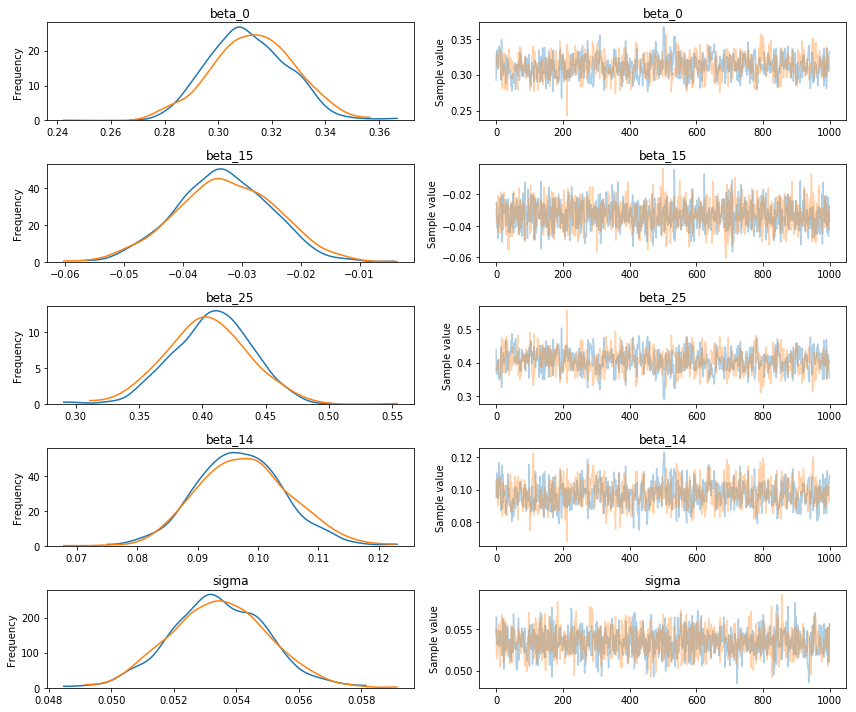

In [52]:
pm.traceplot(trace);

As you can see above, beta_15, my variable of interest, is actually shown to have a negative impact on voter turnout in this (very incomplete!) model. Currently, it is accounting for larger values than in my final frequentist model, presumably due to the lack of other variables in this model.

This chart allows us to understand that in 95% of circumstances tested, increase in the percent of competitive elections led to a decrease in turnout.

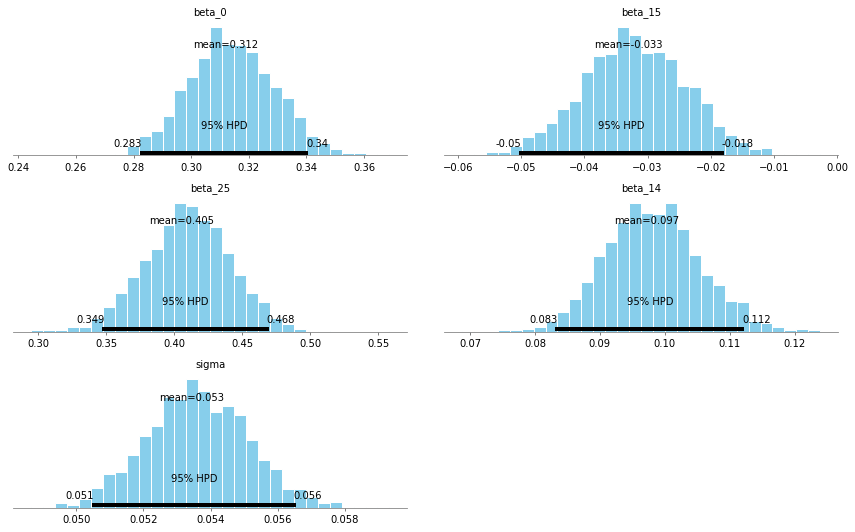

In [54]:
pm.posteriorplot.plot_posterior(trace);

In [55]:
pm.summary(trace).round(3)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
beta_0,0.312,0.015,0.001,0.283,0.340,498.129,1.003
beta_15,-0.033,0.008,0.000,-0.050,-0.018,1241.315,1.000
beta_25,0.405,0.031,0.001,0.349,0.468,473.774,1.003
beta_14,0.097,0.007,0.000,0.083,0.112,574.899,1.002
sigma,0.053,0.002,0.000,0.051,0.056,1116.254,1.000


## Metrics

The below metrics are not easy for me to explain, but they do let me know that my model with only these variables is not particularly accurate.

In [72]:
pm.waic(trace, model)

WAIC_r(WAIC=-1991.1722178608888, WAIC_se=36.17558521352092, p_WAIC=3.8604996023884364, var_warn=0)